In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# logistic regression
from sklearn.linear_model import LogisticRegression

# import svm
from sklearn import svm
from sklearn.svm import SVC

# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikasukani/loan-eligible-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\chrys\.cache\kagglehub\datasets\vikasukani\loan-eligible-dataset\versions\1


In [35]:
ls {path}

 Volume in drive C has no label.
 Volume Serial Number is D687-9345

 Directory of C:\Users\chrys\.cache\kagglehub\datasets\vikasukani\loan-eligible-dataset\versions\1

20/10/2025  19.16    <DIR>          .
20/10/2025  19.16    <DIR>          ..
20/10/2025  19.16            21.957 loan-test.csv
20/10/2025  19.16            38.013 loan-train.csv
               2 File(s)         59.970 bytes
               2 Dir(s)  112.003.399.680 bytes free


In [36]:
df_train = pd.read_csv(path + "/loan-train.csv")
df_test = pd.read_csv(path + "/loan-test.csv")

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [39]:
df_train = df_train.drop('Loan_ID', axis=1).dropna()

In [40]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [41]:
# Define categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 
                      'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']

# Apply one-hot encoding
df_train_encoded = pd.get_dummies(
    df_train, 
    columns=categorical_columns,
    drop_first=True
)

In [ ]:
# scaler

In [42]:
df_train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,False,False,False,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,True,False,True,False,True


In [43]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          480 non-null    int64  
 1   CoapplicantIncome        480 non-null    float64
 2   LoanAmount               480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Gender_Male              480 non-null    bool   
 6   Married_Yes              480 non-null    bool   
 7   Education_Not Graduate   480 non-null    bool   
 8   Self_Employed_Yes        480 non-null    bool   
 9   Property_Area_Semiurban  480 non-null    bool   
 10  Property_Area_Urban      480 non-null    bool   
 11  Dependents_1             480 non-null    bool   
 12  Dependents_2             480 non-null    bool   
 13  Dependents_3+            480 non-null    bool   
 14  Loan_Status_Y            480 no

In [44]:
df_train_cleaned = df_train_encoded.copy()

In [45]:
# test df prep
df_test = df_test.drop('Loan_ID', axis=1).dropna()
df_test_encoded = pd.get_dummies(
    df_test, 
    columns=categorical_columns[:-1],  # Exclude 'Loan_Status' for test set
    drop_first=True
)
df_test_encoded['CoapplicantIncome'] = df_test_encoded['CoapplicantIncome'].astype(float)
df_test_cleaned = df_test_encoded.copy()

df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          289 non-null    int64  
 1   CoapplicantIncome        289 non-null    float64
 2   LoanAmount               289 non-null    float64
 3   Loan_Amount_Term         289 non-null    float64
 4   Credit_History           289 non-null    float64
 5   Gender_Male              289 non-null    bool   
 6   Married_Yes              289 non-null    bool   
 7   Education_Not Graduate   289 non-null    bool   
 8   Self_Employed_Yes        289 non-null    bool   
 9   Property_Area_Semiurban  289 non-null    bool   
 10  Property_Area_Urban      289 non-null    bool   
 11  Dependents_1             289 non-null    bool   
 12  Dependents_2             289 non-null    bool   
 13  Dependents_3+            289 non-null    bool   
dtypes: bool(9), float64(4), int64(1

In [46]:
# train test split
X = df_train_cleaned.drop('Loan_Status_Y', axis=1)
y = df_train_cleaned['Loan_Status_Y']

In [47]:
# logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

C:\Users\chrys\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
# make predictions
y_pred = logreg.predict(X)
print("Logistic Regression Training Accuracy:", accuracy_score(y, y_pred))

Logistic Regression Training Accuracy: 0.8104166666666667


In [49]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Confusion Matrix:
 [[ 64  84]
 [  7 325]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.43      0.58       148
        True       0.79      0.98      0.88       332

    accuracy                           0.81       480
   macro avg       0.85      0.71      0.73       480
weighted avg       0.83      0.81      0.79       480



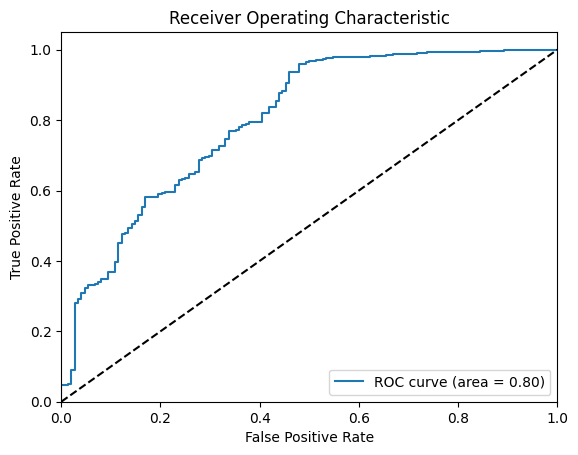

In [50]:
# ROC curve
y_prob = logreg.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
df_test_logreg = df_test_cleaned.copy()

# predict the test set
y_test_pred = logreg.predict(df_test_logreg)

# combine predictions into df_test_logreg
df_test_logreg['Loan_Status_Predicted'] = y_test_pred
df_test_logreg.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Predicted
0,5720,0.0,110.0,360.0,1.0,True,True,False,False,False,True,False,False,False,True
1,3076,1500.0,126.0,360.0,1.0,True,True,False,False,False,True,True,False,False,True
2,5000,1800.0,208.0,360.0,1.0,True,True,False,False,False,True,False,True,False,True
4,3276,0.0,78.0,360.0,1.0,True,False,True,False,False,True,False,False,False,True
5,2165,3422.0,152.0,360.0,1.0,True,True,True,True,False,True,False,False,False,True


In [52]:
# grid search for svc
svc_model = SVC(probability=False, kernel='linear', C=0.1)
svc_model.fit(X,y)

,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
# make predictions
y_svc_pred = svc_model.predict(X)
print("SVC Training Accuracy:", accuracy_score(y, y_svc_pred))

SVC Training Accuracy: 0.79375


In [54]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_svc_pred))
print("Classification Report:\n", classification_report(y, y_svc_pred))

Confusion Matrix:
 [[ 54  94]
 [  5 327]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.36      0.52       148
        True       0.78      0.98      0.87       332

    accuracy                           0.79       480
   macro avg       0.85      0.67      0.70       480
weighted avg       0.82      0.79      0.76       480



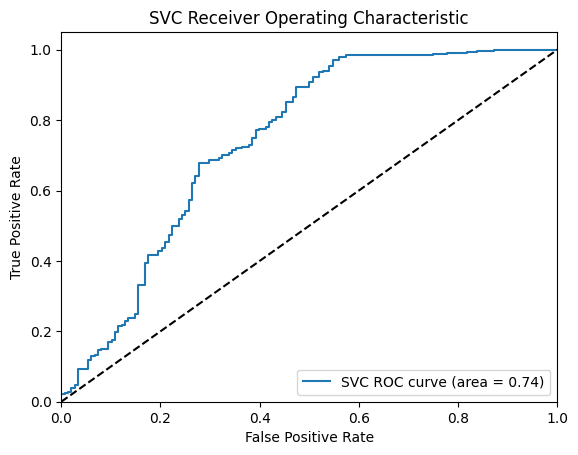

In [55]:
# ROC curve for SVC
y_svc_prob = svc_model.decision_function(X)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y, y_svc_prob)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.figure()
plt.plot(fpr_svc, tpr_svc, label='SVC ROC curve (area = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
df_test_svc = df_test_cleaned.copy()

# predict the test set
y_test_pred = svc_model.predict(df_test_svc)

# combine predictions into df_test_svc
df_test_svc['Loan_Status_Predicted'] = y_test_pred
df_test_svc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Predicted
0,5720,0.0,110.0,360.0,1.0,True,True,False,False,False,True,False,False,False,True
1,3076,1500.0,126.0,360.0,1.0,True,True,False,False,False,True,True,False,False,True
2,5000,1800.0,208.0,360.0,1.0,True,True,False,False,False,True,False,True,False,True
4,3276,0.0,78.0,360.0,1.0,True,False,True,False,False,True,False,False,False,True
5,2165,3422.0,152.0,360.0,1.0,True,True,True,True,False,True,False,False,False,True


In [57]:
# decision tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
# predict with decision tree
y_dt_pred = dt_model.predict(X)
print("Decision Tree Training Accuracy:", accuracy_score(y, y_dt_pred))

Decision Tree Training Accuracy: 0.8291666666666667


In [59]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_dt_pred))
print("Classification Report:\n", classification_report(y, y_dt_pred))

Confusion Matrix:
 [[ 73  75]
 [  7 325]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.49      0.64       148
        True       0.81      0.98      0.89       332

    accuracy                           0.83       480
   macro avg       0.86      0.74      0.76       480
weighted avg       0.84      0.83      0.81       480



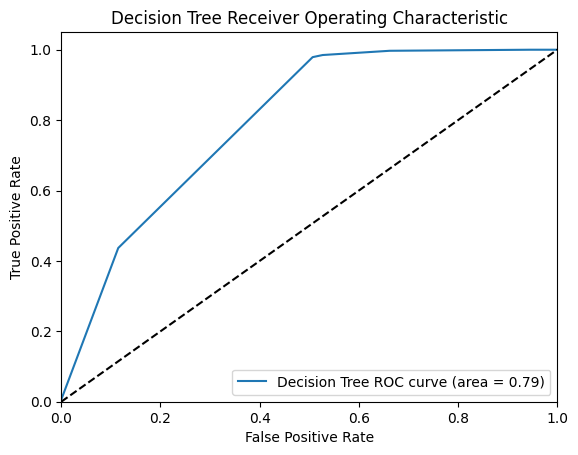

In [60]:
# roc curve for decision tree
y_dt_prob = dt_model.predict_proba(X)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y, y_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
df_test_dt = df_test_cleaned.copy()

# predict the test set
y_test_pred = dt_model.predict(df_test_dt)

# combine predictions into df_test_dt
df_test_dt['Loan_Status_Predicted'] = y_test_pred
df_test_dt.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Predicted
0,5720,0.0,110.0,360.0,1.0,True,True,False,False,False,True,False,False,False,True
1,3076,1500.0,126.0,360.0,1.0,True,True,False,False,False,True,True,False,False,True
2,5000,1800.0,208.0,360.0,1.0,True,True,False,False,False,True,False,True,False,True
4,3276,0.0,78.0,360.0,1.0,True,False,True,False,False,True,False,False,False,True
5,2165,3422.0,152.0,360.0,1.0,True,True,True,True,False,True,False,False,False,True
